###  The Art and Science of Storytelling with Data Visualizations

#### Basic Graphs
- Bar
- Histogram
- Scatter Plot
- Line Plot
- Box Plot

#### About the Notebook.
- This notebook is all about exploration of data through visualizations.
    - We use visualizations at three stages.
        - Data Exploration
        - Model building (for model comparison and performance checking)
        - Results Interpretation
    - We can see how visualizations can reveal about data during exploration.
- We consider a periodical data about the countries gdp per capita over years since 1952. Data is collected for every five years upto 2007
  

##### Asking Questions for visualizations
- Why visualizations?- The simplest answer that I know is that "a picture speaks a thousand words". 
    - So can we give the crux of the data. 
        -In some cases, we want to give summary of the data, in some cases we like to see the trend of an entity(increasing or decreasing), in some cases we like to compare two entities and so on.
    - Visualization is an expression of what we intend to say. So it needs to be clear and coherent. To get such plots, we need to ask right questions and we need to know which plots would be appropriate

##### Import necessary libraries/modules

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Getting the data

In [3]:
## URL to get the GDP data.
data_url = 'http://bit.ly/2cLzoxH'

## Read GDP data from URL.
data=pd.read_csv(data_url)

In [4]:
## Get the first 5 records of GDP data.
data.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


#### Lets look at the summary of the data using the describe function for all attributes

In [5]:
## Get the sumary statistics of GDP data.
data.describe(include='all')

,country,year,pop,continent,lifeExp,gdpPercap
count,1704,1704.00000,1.704000e+03,1704,1704.000000,1704.000000
unique,142,NaN,NaN,5,NaN,NaN
top,Madagascar,NaN,NaN,Africa,NaN,NaN
freq,12,NaN,NaN,624,NaN,NaN
mean,NaN,1979.50000,2.960121e+07,NaN,59.474439,7215.327081
std,NaN,17.26533,1.061579e+08,NaN,12.917107,9857.454543
min,NaN,1952.00000,6.001100e+04,NaN,23.599000,241.165877
25%,NaN,1965.75000,2.793664e+06,NaN,48.198000,1202.060309
50%,NaN,1979.50000,7.023596e+06,NaN,60.712500,3531.846989
75%,NaN,1993.25000,1.958522e+07,NaN,70.845500,9325.462346


In [6]:
## Get the columns data types of GDP data.
data.dtypes

country       object
year           int64
pop          float64
continent     object
lifeExp      float64
gdpPercap    float64
dtype: object

- Observation
    1. There are 1704 records and 6 attributes
    2. Country and Continent are considered as categorical (we can observe frequency counts)
    3. year is considered as numeric (summary stats are described)

#### We see that there are countries and continents. 
- Let us say we want to find how many records are there for each continent

In [14]:
## Get continent levels count by using group by.
X=data.groupby('continent')['continent'].count()
X

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: continent, dtype: int64

In [15]:
## Get continent levels count by using value_count() method.
data.continent.value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

##### The same table can be represented in the form of a barplot
- Lets draw our first plot of the session a bar plot

<BarContainer object of 5 artists>

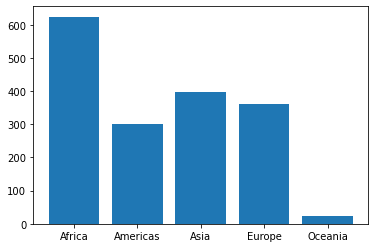

In [16]:
## Plot the continent levels count using pyplot.
plt.bar(X.index,X)

- We can also plot this using pandas plot
    - since X is a pandas series, it has a method plot

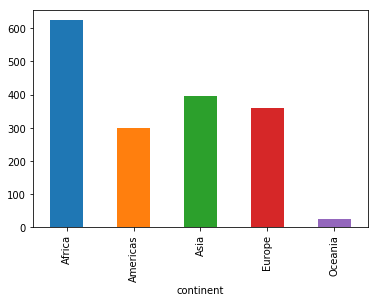

In [10]:
## Plot the continent levels count using pandas series.
x.plot(kind='bar')

- We can do the same using seaborn

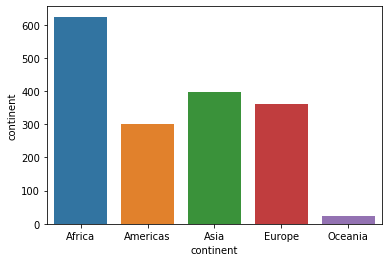

In [12]:
## Plot the continent levels count using seaborn.
#plt.style.use('dark_background')
sns.barplot(x= X.index, y=X)

In [20]:
## Sort the level count of continent.
X = X.sort_values()
X

continent
Oceania      24
Americas    300
Europe      360
Asia        396
Africa      624
Name: continent, dtype: int64

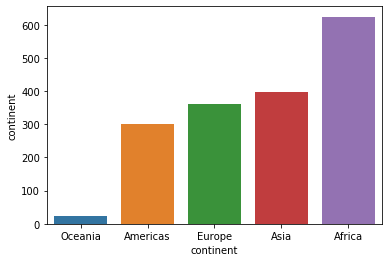

In [15]:
## Plot the continent levels count after sorting count using seaborn.
sns.barplot(x=X.index,y=X)

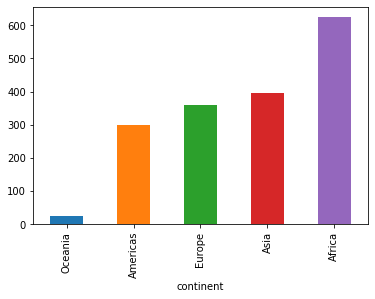

In [16]:
## Plot the continent levels count after sorting count using pandas series.
X.plot(kind='bar') 

##### Observe that the labels are not given for any of the plots above. Let's put the axis labels

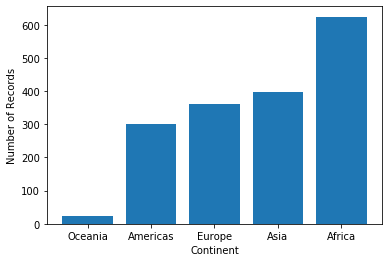

In [23]:
## Add lables.
fig=plt.bar(X.index,X)
plt.xlabel('Continent')
plt.ylabel('Number of Records')
plt.show(fig)

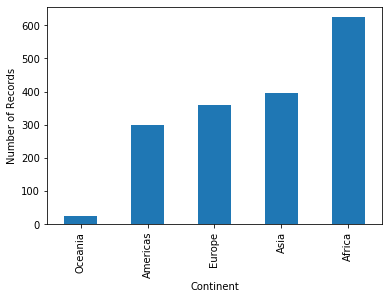

In [24]:
## Add labels.
fig=X.plot(kind="bar")
plt.xlabel('Continent')
plt.ylabel('Number of Records')
plt.show(fig)

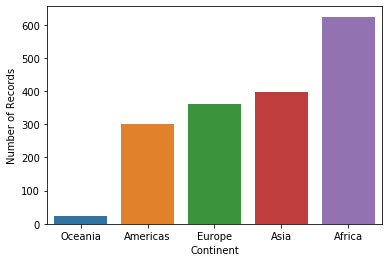

In [25]:
## Add labels.
fig=sns.barplot(x=X.index,y=X)
plt.xlabel('Continent')
plt.ylabel('Number of Records')
plt.show(fig)

- Let us suppose, I want to check how many countries from each continent information is available

In [22]:
## Get the county count accorss each contient level and display it.
data_continents=data.groupby('continent').agg({
    'continent':'count',
    'country': "nunique"
})
data_continents

,continent,country
continent,,
Africa,624,52
Americas,300,25
Asia,396,33
Europe,360,30
Oceania,24,2


- Let's plot how many unique countries for each continent information is available

In [28]:
## Sort the county count.
data_continents = data_continents.sort_values('country')

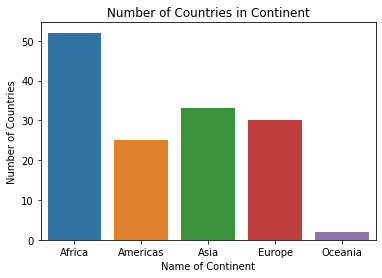

In [19]:
## Plot continent VS number of countries.
fig=sns.barplot(x=data_continents.index,y=data_continents.country)
plt.ylabel("Number of Countries")
plt.xlabel("Name of Continent")
plt.title("Number of Countries in Continent")
plt.show(fig)

In [23]:
## If we want to know the increase in population over time.

- We need to group by year, and get the sum of population by year

In [24]:
## Group by year and population to see the population change.
data_pop=data.groupby(['year'])['pop'].sum().reset_index()
data_pop

,year,pop
0,1952,2.406957e+09
1,1957,2.664405e+09
2,1962,2.899783e+09
3,1967,3.217478e+09
4,1972,3.576977e+09
5,1977,3.930046e+09
6,1982,4.289437e+09
7,1987,4.691477e+09
8,1992,5.110710e+09
9,1997,5.515204e+09


- Plotting the above table using seaborn

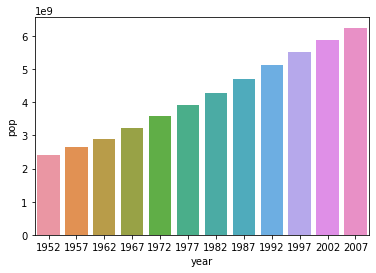

In [21]:
## Plot popukation count vs year.
sns.barplot(x='year',y='pop',data=data_pop)

#### There seems to be a steady increase but is it really


- To understand this, we derive a new feature which is percentage increase in population compared to previous year

In [23]:
## Get population percentage for each year.
data_pop['Perc_inc'] = 100*(data_pop['pop'].pct_change())
data_pop

,year,pop,Perc_inc
0,1952,2.406957e+09,NaN
1,1957,2.664405e+09,10.695971
2,1962,2.899783e+09,8.834184
3,1967,3.217478e+09,10.955834
4,1972,3.576977e+09,11.173308
5,1977,3.930046e+09,9.870587
6,1982,4.289437e+09,9.144703
7,1987,4.691477e+09,9.372806
8,1992,5.110710e+09,8.936052
9,1997,5.515204e+09,7.914638


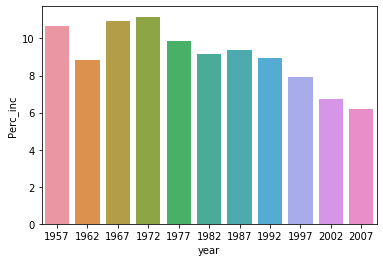

In [25]:
## Plot population percentage for each year.
sns.barplot(x='year',y='Perc_inc',data=data_pop.iloc[1:,:])

##### Ideally, when we want to show the trend (for example, in this case how is the world population growing  over time) over time, line plots are more appropriate. So lets draw a line plot

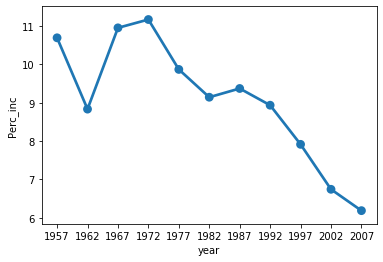

In [35]:
## Draw line plot for population percentage and year.
sns.pointplot(x='year',y='Perc_inc',data=data_pop.iloc[1:,:])

(0, 11.51674403870269)

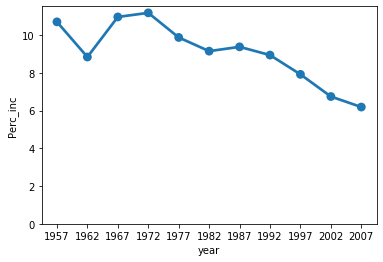

In [36]:
## Start the y-axis from 0.(Above line plot looks like after 2007 there is no population,so that's why we are movig y-axis starting point).
fig=sns.pointplot(x='year',y='Perc_inc',data=data_pop.iloc[1:,:])
axes=plt.gca()
axes.set_ylim([0,None])

#### Since Asia has two highly populated countries in the world, we want to know if the population growth of India over the years is similar to that of rest of the world

In [37]:
## Get India population.
data_india=data.loc[ (data['country']=='India'),['year','country','pop']]

In [38]:
## Display India popuation.
data_india

,year,country,pop
696,1952,India,3.720000e+08
697,1957,India,4.090000e+08
698,1962,India,4.540000e+08
699,1967,India,5.060000e+08
700,1972,India,5.670000e+08
701,1977,India,6.340000e+08
702,1982,India,7.080000e+08
703,1987,India,7.880000e+08
704,1992,India,8.720000e+08
705,1997,India,9.590000e+08


In [39]:
## Get population percentage.
data_india['Perc_inc']=100*(data_india['pop'].pct_change())

In [40]:
## Display india population.
data_india

,year,country,pop,Perc_inc
696,1952,India,3.720000e+08,NaN
697,1957,India,4.090000e+08,9.946237
698,1962,India,4.540000e+08,11.002445
699,1967,India,5.060000e+08,11.453744
700,1972,India,5.670000e+08,12.055336
701,1977,India,6.340000e+08,11.816578
702,1982,India,7.080000e+08,11.671924
703,1987,India,7.880000e+08,11.299435
704,1992,India,8.720000e+08,10.659898
705,1997,India,9.590000e+08,9.977064


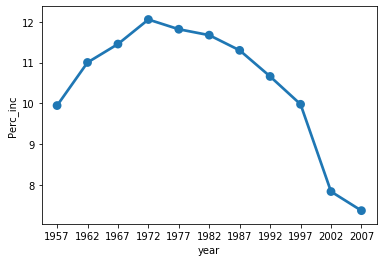

In [41]:
## Draw line plot for year and india population percentage.
sns.pointplot(x='year',y='Perc_inc',data=data_india.iloc[1:,:])

(0, 12.377796509455816)

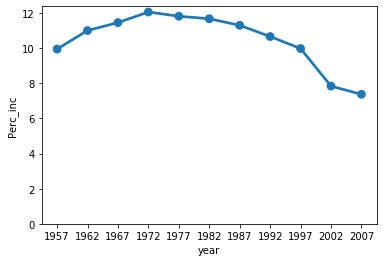

In [42]:
## Move the y-axis starting point.
sns.pointplot(x='year',y='Perc_inc',data=data_india.iloc[1:,:])
axes=plt.gca()
axes.set_ylim([0,None])

##### Check, Is China's growth is similar to India

#### Sub Plots:

Let us compare the %increase in population of China and India

In [26]:
## Get the China population.
data_china=data.loc[ (data['country']=='China'),['year','country','pop']]

## Convert population in percentage.
data_china['Perc_inc'] = 100*(data_china['pop'].pct_change())

In [27]:
## Display China population.
data_china

,year,country,pop,Perc_inc
288,1952,China,5.562635e+08,NaN
289,1957,China,6.374080e+08,14.587415
290,1962,China,6.657700e+08,4.449583
291,1967,China,7.545500e+08,13.334935
292,1972,China,8.620300e+08,14.244252
293,1977,China,9.434550e+08,9.445727
294,1982,China,1.000281e+09,6.023181
295,1987,China,1.084035e+09,8.373047
296,1992,China,1.164970e+09,7.466087
297,1997,China,1.230075e+09,5.588556


(0.0, 15.167289629256882)

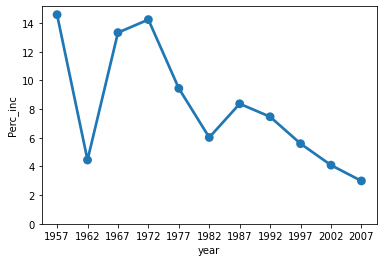

In [28]:
## Draw line plot for year vs china population percentage.
sns.pointplot(x='year',y='Perc_inc',data=data_china.iloc[1:,:])
axes=plt.gca()
axes.set_ylim([0,None])

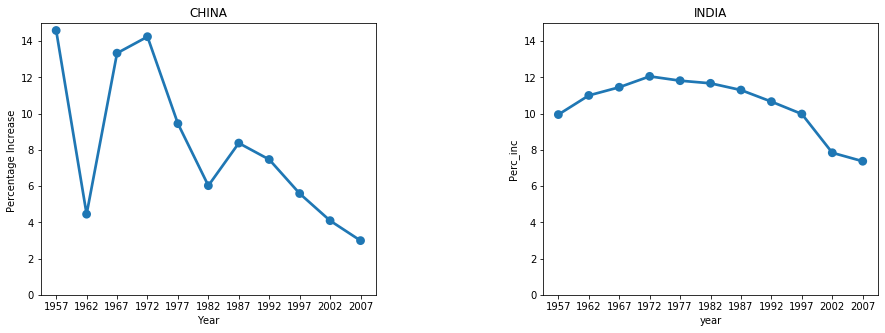

In [46]:
## Compare India population with China population.

fig, ax = plt.subplots(1, 2,figsize=(15,5))
fig.subplots_adjust(wspace=0.5)


sns.pointplot(x='year',y='Perc_inc',data=data_china.iloc[1:,:],ax=ax[0],sharey=True)
ax[0].set_title('CHINA')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Percentage Increase ')



ax[1].set_title('INDIA')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percentage Increase ')
sns.pointplot(x='year',y='Perc_inc',data=data_india.iloc[1:,:],ax=ax[1],sharey=True)

axes = fig.axes
axes[0].set_ylim(0,15)
axes[1].set_ylim(0,15)


plt.show()

##### Lets understand some formatting techniques for seaborn plot. 
- For a clear communication of information, the plot should have title, label, legend etc. We shall work on some of those aspects now

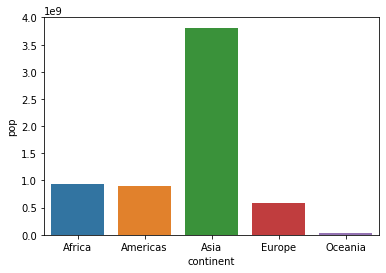

In [47]:
## Get sum of population for each continent and draw bar plot.
data_tot=data.groupby(['year','continent'])['pop'].sum().reset_index()
data_2007=data_tot[data_tot['year']==2007]
sns.barplot(x='continent',y='pop',data=data_2007)

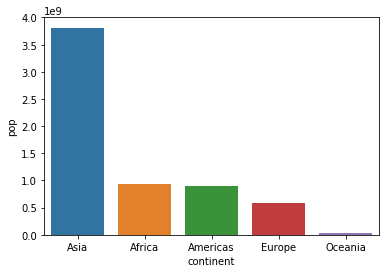

In [53]:
## Bar plot won't sort the value,we have to sort data and give the values to bar plot.For sorting use sort_values() fucntion.
data_tot=data.groupby(['year','continent']).sum().sort_values(by='pop',ascending=False).reset_index()
data_2007=data_tot[data_tot['year']==2007]
sns.barplot(x='continent',y='pop',data=data_2007)

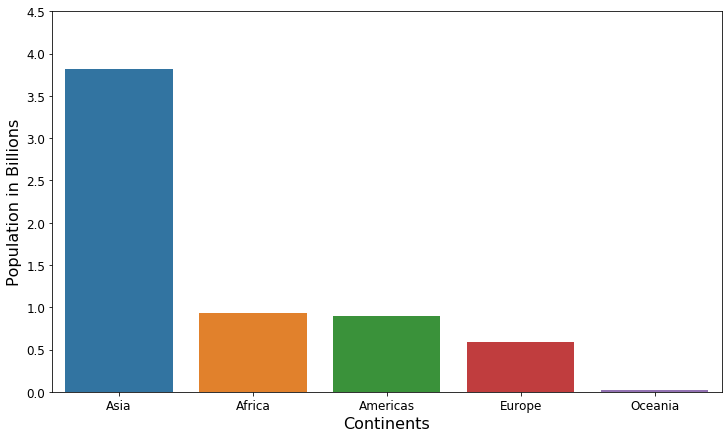

In [55]:
## Lets work on seaborn.
## set figure size to 12, 7.
plt.figure(figsize=(12,7))
## seaborn bar plot.
sns.barplot(x='continent',y='pop',data=data_2007)
## xticks fontsize to 12.
plt.xticks(fontsize=12)
## ytics fontsize also to 24 but get loc and labels .
loc,labels=plt.yticks(fontsize=12)
## set loc and labels as loc, loc/1e9 (lables be just divided by 1e9 to scale by billions).
plt.yticks(loc,loc/1e9)
## set xlabel as 'Continents' with fontsize 16.
plt.xlabel('Continents',fontsize=16)
## set ylabel as Population Billions to fontsize 16.
plt.ylabel('Population in Billions',fontsize=16)
## show plot.
plt.show()

#### Observe the data_tot has 3 attributes- year, continent and population
- Lets say we want to compare the population growth of all the continents by year

In [56]:
## Get the population sum accorss year andd continent.
data_tot=data.groupby(['year','continent'])['pop'].sum().reset_index()

In [57]:
## Display first 5 records of population sum accorss year and continent.
data_tot.head()

,year,continent,pop
0,1952,Africa,2.376405e+08
1,1952,Americas,3.451524e+08
2,1952,Asia,1.395357e+09
3,1952,Europe,4.181208e+08
4,1952,Oceania,1.068601e+07


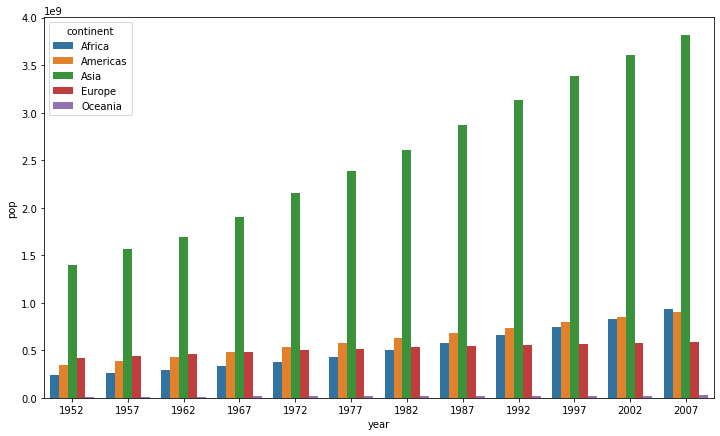

In [58]:
## Draw barplot for population sum and each year,continent.
plt.figure(figsize=(12,7))
sns.barplot(x='year',y='pop',hue='continent',data=data_tot)

- Asia seems to be dominating and beside it, Oceania appears like zero but its actally not. So let's keep Asia out of this for the moment

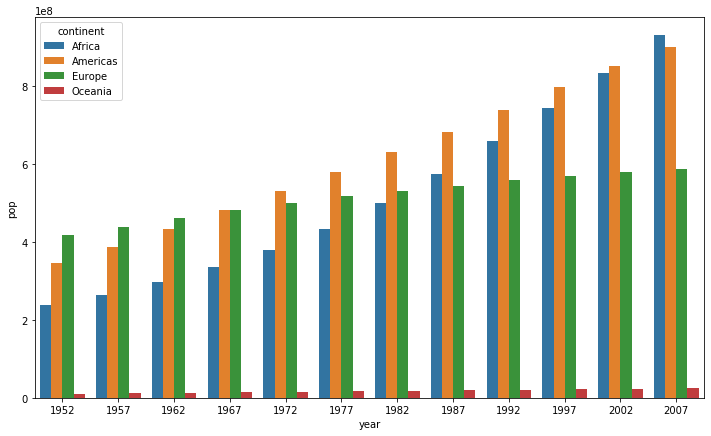

In [59]:
## Draw a barplot for population sum and each year,continent without including Asia continent.
plt.figure(figsize=(12,7))
sns.barplot(x='year',y='pop',hue='continent',data=data_tot[data_tot['continent']!='Asia'])

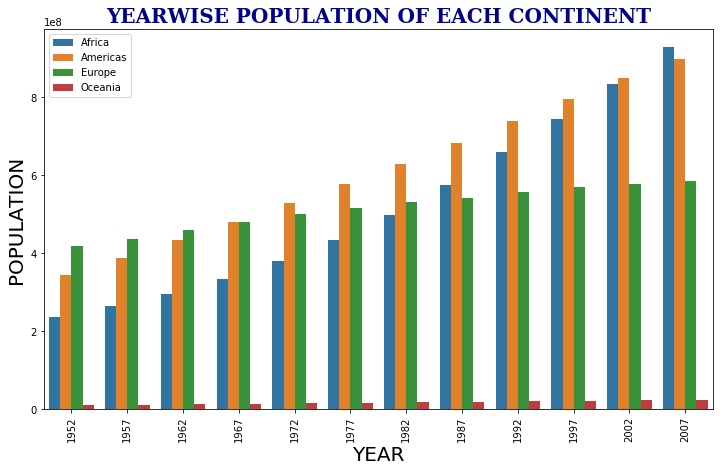

In [60]:
## Draw a barplot for sum of pupulation VS each year without including Asia continent.
font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'heavy',
        'size': 20
        }


plt.figure(figsize=(12,7))
sns.barplot(x='year',y='pop',hue='continent',data=data_tot[data_tot['continent']!='Asia'])

plt.xlabel('YEAR', fontdict={'size': 20})
plt.xticks(rotation='vertical')
plt.ylabel('POPULATION', fontdict={'size': 20})
plt.title('YEARWISE POPULATION OF EACH CONTINENT', fontdict=font)
plt.legend(loc='upper left')
plt.show()


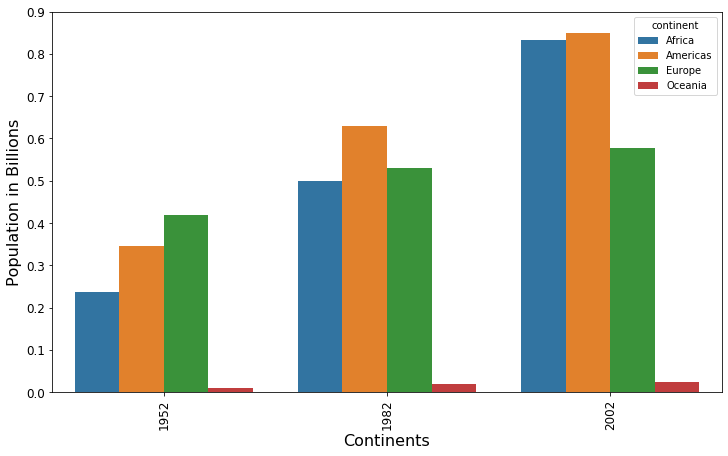

In [60]:
## Get population sum for 1952,1982,2002 years without including Asia continent and draw a barplot.

plt.figure(figsize=(12,7))
sns.barplot(x='year',y='pop',hue='continent',data=data_tot[(data_tot['continent']!='Asia')&(data_tot['year'].isin([1952,1982,2002]))])
plt.xticks(fontsize=12,rotation="vertical")
## ytics fontsize also to 24 but get loc and labels.
loc,lablels=plt.yticks(fontsize=12)
## set loc and labels as loc, loc/1e9 (lables be just divided by 1e9 to scale by billions).
plt.yticks(loc,loc/1e9)
## set xlabel as 'Continents' with fontsize 16.
plt.xlabel('Continents',fontsize=16)
## set ylabel as Population Billions to fontsize 16.
plt.ylabel('Population in Billions',fontsize=16)
## show plot.
plt.show()

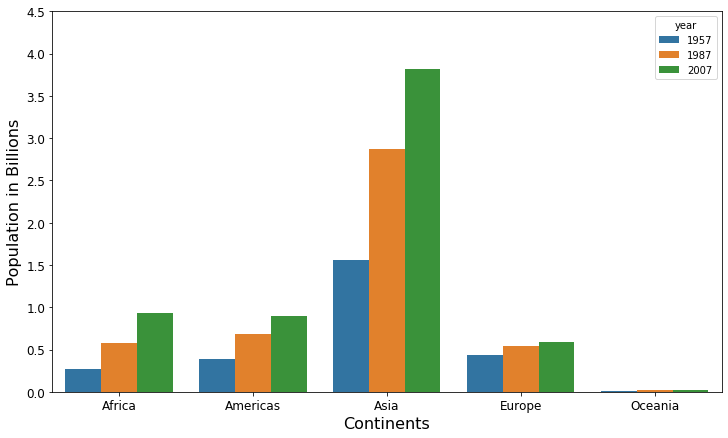

In [62]:
## Get population sum for 1952,1987,2007 years including Asia continent and draw a barplot.

plt.figure(figsize=(12,7))
sns.barplot(x='continent',y='pop',hue='year',data=data_tot[data_tot['year'].isin([1957,1987,2007])])
plt.xticks(fontsize=12)
## yticks fontsize also to 24 but get loc and labels. 
loc,lables=plt.yticks(fontsize=12)
## set loc and labels as loc, loc/1e9 (lables be just divided by 1e9 to scale by billions).
plt.yticks(loc,loc/1e9)
## set xlabel as 'Continents' with fontsize 16.
plt.xlabel('Continents',fontsize=16)
## set ylabel as Population Billions to fontsize 16.
plt.ylabel('Population in Billions',fontsize=16)
## show plot.
plt.show()

#####  How is the distribution of Life expectancy in Asia
- To study this, we go with histograms and understand impact of bins

c:\users\jvnra\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


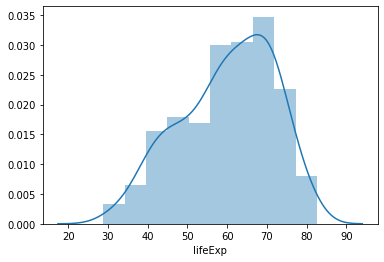

In [63]:
## Draw distrubution plot for Asia continent life expectancy with 10 bins.
sns.distplot(data[data['continent']=="Asia"]['lifeExp'],bins=10)

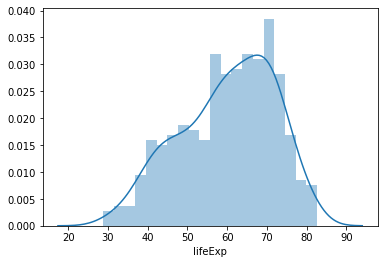

In [64]:
## Draw distrubution plot for Asia continent life expectancy with 20 bins.
sns.distplot(data[data['continent']=="Asia"]['lifeExp'],bins=20)

#### Lets understand the box plots
- How is the life expectancy of people across the world
    - Do people is certain continents live longer than the other 
        - Lets average the life expectancy for a continent for each year

In [65]:
## Get the average life expectation across each year and each continent.
data_life=data.groupby(['year','continent'])['lifeExp'].mean().reset_index()

In [66]:
## Display averagee life expectation across each year and each continent.
data_life

,year,continent,lifeExp
0,1952,Africa,39.135500
1,1952,Americas,53.279840
2,1952,Asia,46.314394
3,1952,Europe,64.408500
4,1952,Oceania,69.255000
5,1957,Africa,41.266346
6,1957,Americas,55.960280
7,1957,Asia,49.318544
8,1957,Europe,66.703067
9,1957,Oceania,70.295000


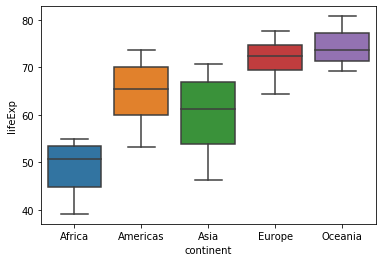

In [67]:
## Plot life expectation distrbution accorss each continent.
sns.boxplot(x='continent',y='lifeExp',data=data_life)

- Although, it shows some information-observe that we have taken mean of life expectency for year by continent so we have 12 points for each continent and in most cases interpretation based sample size of twelve may not be accurate

##### The time factor is missing . 
- If we want to understand how life expectancy evolved over time for all continents

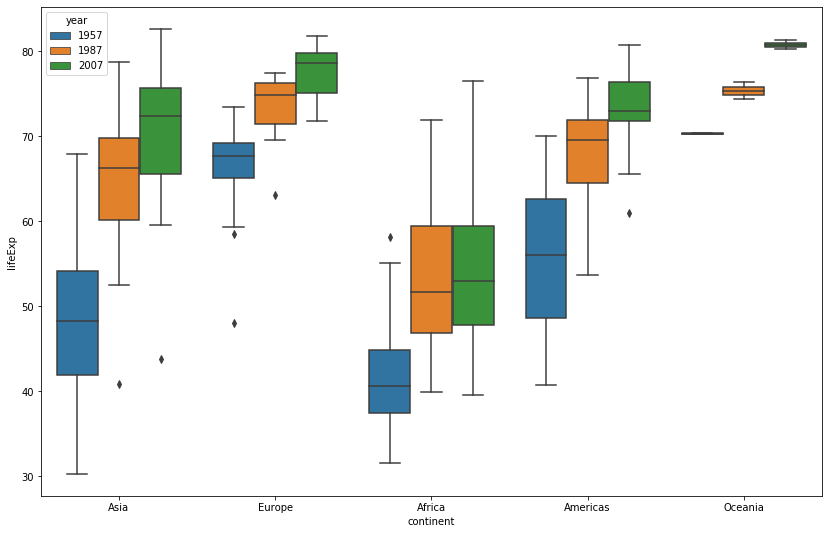

In [68]:
## Plot life expectation distrbution accorss each continent for 1957,1987,2007 years.
plt.figure(figsize=(14,9))
sns.boxplot(x='continent',y='lifeExp',hue='year',data=data[data['year'].isin([1957,1987,2007])])
plt.show()

###### understand how the life expectancy of Asia changed over time.

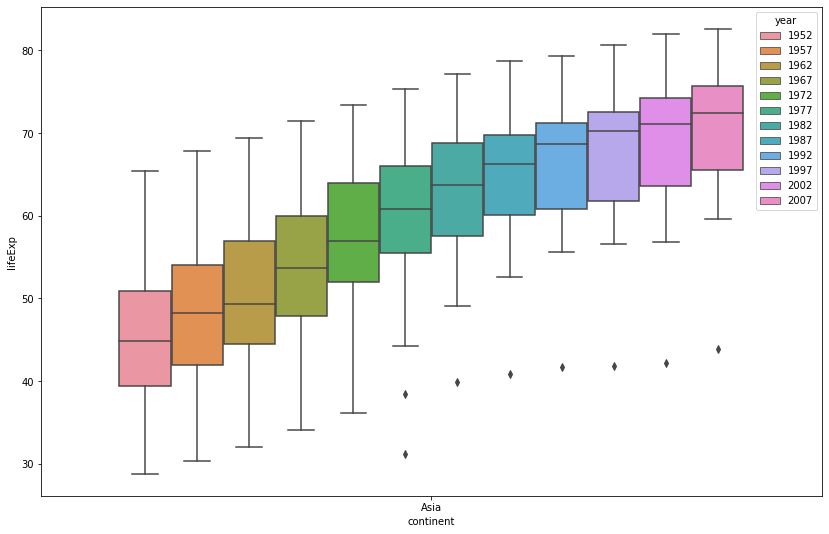

In [69]:
## Plot life expectation for year year of Asia continent.
plt.figure(figsize=(14,9))
sns.boxplot(x='continent',y='lifeExp',hue='year',data=data[data['continent']=="Asia"])
plt.show()

#### Scatter Plot
- It is the human nature to compare. We always do this. How is one factor affecting the other. Like how are my expenses with respect to my sal or how are my savings wrt my salary (just as an example!)
- A quantitative way of analysing these relationships can be done using scatterplots
- Let's say for example I want to know if gdp per capita and life expectancy are related
    - Intuitively, more money there is a better healthcase system and hence life exp is higher and viceversa. But is it true- can we identify this pattern in this data

c:\users\jvnra\miniconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


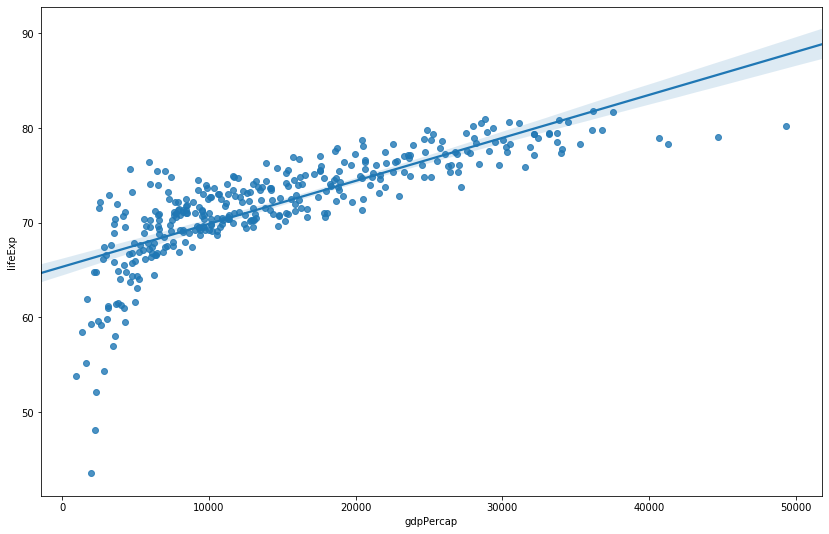

In [70]:
plt.figure(figsize=(14,9))
sns.regplot(x='gdpPercap',y='lifeExp',data=data[data['continent']=='Europe'])
plt.show()